In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from lab_helper import *

In [67]:
f_0 = (163.1 * 1e6, 0.1 * 1e6)
omega_0 = propogate_uncertainty(2*np.pi * f_0[0], [f_0])

U_r = [(i*1e-3, 1e-3) for i in [128, 129, 129, 130]]

omega_var = tuple(2*np.pi*i for i in (50, 5))

d = (15.2*1e-3, 0.1*1e-3)
N = 45
S = propogate_uncertainty(np.pi * d[0]**2 / 4, [d])

magneton_bora = 927.4 * 10**-26
h_plank       = 1.054 * 10**-34

def get_B(U_r):
    measure = [[ 50.1,  5.57,  5.85],
               [ 70.3,  7.91,  8.20],
               [ 90.2, 10.15, 10.85],
               [110.3, 12.35, 12.80],
               [120.5, 13.45, 13.06],
               [130.1, 14.58, 15.27]]

    x    = [i[0] for i in measure]
    xerr = [0.1]*len(measure)
    y    = [mean_with_uncertainty(((i[1], 0.01), (i[2], 0.01)))[0] for i in measure]
    yerr = [mean_with_uncertainty(((i[1], 0.01), (i[2], 0.01)))[1] for i in measure]

    k = plot_and_fit_proportional("probe_plot.png", r"$\epsilon(U)$", r"$U, мВ$", r"$\epsilon, мВ$", x, y, xerr, yerr)

    eps = propogate_uncertainty(k[0] * U_r[0], [k, U_r])

    B = propogate_uncertainty(eps[0] / (S[0] * N * omega_var[0]), [eps, S, omega_var])

    return B

k: (0.11360429618086254 +- 0.0009737362161498405)


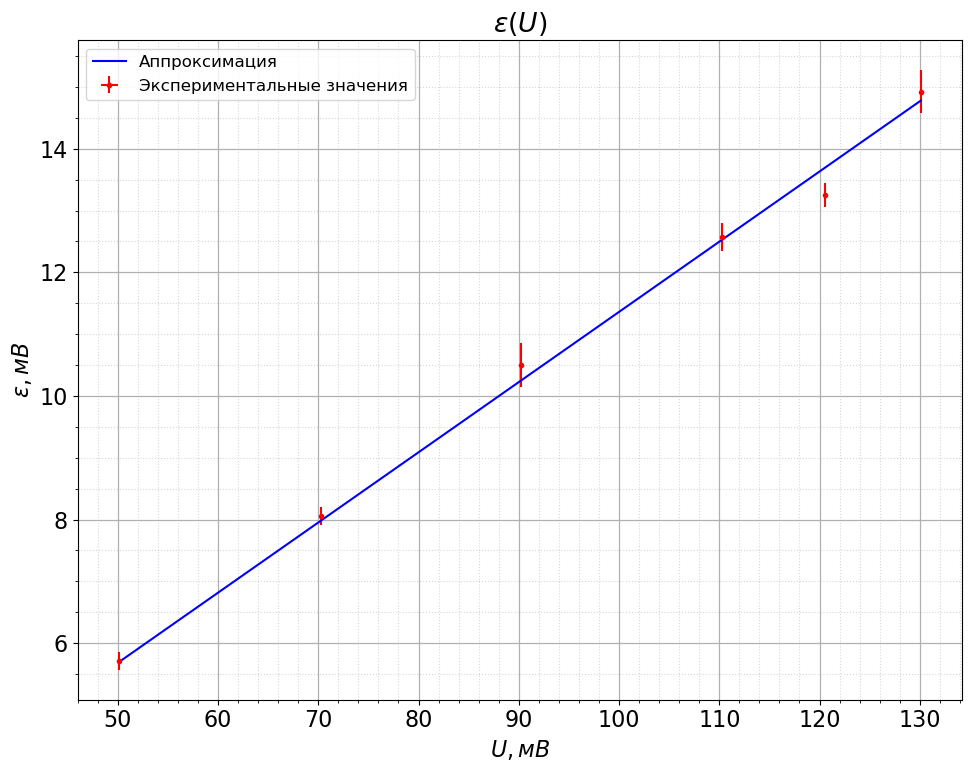

[np.float64(0.005712747408860656), np.float64(0.0005765873909394238)]
$g =$ [np.float64(2.0387422667741366), np.float64(0.20577398046033613)]


In [68]:
U_r_mean = mean_with_uncertainty(U_r)

B = get_B(U_r_mean)

print(B)

g = propogate_uncertainty(h_plank * omega_0[0] / (magneton_bora * B[0]), [B, omega_0])

print(r"$g =$", g)

In [69]:
Delta_l  = (1, 0.1)
Double_L = (6, 0.1)

Delta_B = propogate_uncertainty(Delta_l[0] / Double_L[0] * B[0], [Delta_l, Double_L, B])

print(r"$\Delta B$ =", format_latex_value(Delta_B))

$\Delta B$ = $0.0010 \pm 0.0001$
